# **Stage 1: Classification – Predicting Placement Outcome**



"""

Pathrise Classification Project - Stage 1

This script performs binary classification to predict whether a Pathrise participant will be placed or not.

The data used here has already been preprocessed in a separate script (e.g., handling missing values, encoding and ...).

Multiple machine learning models are trained and evaluated to compare performance:

- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbors (KNN)
- XGBoost

The goal is to identify the best-performing model for predicting placement outcome.

پروژه طبقه‌بندی Pathrise - مرحله اول

این اسکریپت یک مدل طبقه‌بندی دودویی ایجاد می‌کند تا پیش‌بینی کند آیا یک شرکت‌کننده در برنامه شاغل خواهد شد یا خیر.

داده‌های مورد استفاده در اینجا قبلاً در یک اسکریپت جداگانه پیش‌پردازش شده‌اند (مانند حذف مقادیر گمشده، کدگذاری و ...).

در این اسکریپت، چندین مدل یادگیری ماشین آموزش داده و ارزیابی می‌شوند تا عملکرد آن‌ها با هم مقایسه شود:

- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbors (KNN)
- XGBoost
- 
هدف این است که بهترین مدل برای پیش‌بینی نتیجه اشتغال انتخاب شود.

"""


# Machine Learning Prediction


In [11]:
#!pip install xgboost


## Import Libraries and Define Auxiliary Functions


We will import the following libraries 


In [14]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# Random Forest classification algorithm
from sklearn.ensemble import RandomForestClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# XG Boost classification algorithm
from xgboost import XGBClassifier
# Allows us to generate a detailed performance report including precision, recall, and F1-score for classification models
from sklearn.metrics import classification_report
# Allows us to save and load Python objects, such as trained models
import pickle
# Allows us to visualize the ROC curve of a classification model
from sklearn.metrics import RocCurveDisplay
# Allows us to compute feature importance based on the impact of each feature on model performance
from sklearn.inspection import permutation_importance


This function plots the confusion matrix for the project

In [16]:
def plot_confusion_matrix(y,y_predict):
    """this function plots the confusion matrix"""
    from sklearn.metrics import confusion_matrix
    fig = plt.figure(figsize = (8, 3))

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
   # Set axis tick labels for 'placed': 0 = not placed, 1 = placed
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

## Load the dataframe


In [18]:
df1 = pd.read_excel('Data_Pathrise.xlsx')

df1.describe()


,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [19]:
# Get value at [row 1, column 2]
df1.iloc[1,2]

'PSO'

In [20]:
df = pd.read_csv('preprocessed_pathrise_df.csv')

df

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing,cohort_tag_APR18A,...,work_auth_grouped_Work Visa,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,NaN,0,2,900,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,NaN,0,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,89.0,1,10,100,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,19.0,0,4,15,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,NaN,0,1,5,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,457.0,0,4,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2146,488.0,0,1,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2147,NaN,0,1,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2148,NaN,0,2,10,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 96 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1615 non-null   float64
 1   placed                                                            2150 non-null   int64  
 2   number_of_interviews                                              2150 non-null   int64  
 3   number_of_applications                                            2150 non-null   int64  
 4   primary_track_Data                                                2150 non-null   int64  
 5   primary_track_Design                                              2150 non-null   int64  
 6   primary_track_PSO                                                 2150 non-null   int64  
 7   primary_track_SWE                

In [22]:
# Calculate the percentage distribution of values in the 'placed' column
df['placed'].value_counts(normalize=True)

placed
0    0.590233
1    0.409767
Name: proportion, dtype: float64

## Define X ,Y

In [24]:
X = df.drop(columns=["program_duration_days","placed"], axis=1)
Y = df["placed"]

In [25]:
X

,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing,cohort_tag_APR18A,cohort_tag_APR18B,cohort_tag_APR19A,...,work_auth_grouped_Work Visa,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,2,900,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,100,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,15,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,5,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,4,15,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2146,1,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2147,1,30,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2148,2,10,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Standardize Features

In [27]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-0.05576151, 16.9810378 , -0.33419399, ...,  1.85283288,
        -0.51449576, -0.20038666],
       [ 1.30659354, -0.71033371, -0.33419399, ...,  1.85283288,
        -0.51449576, -0.20038666],
       [ 2.66894858,  1.25537424, -0.33419399, ..., -0.53971408,
        -0.51449576, -0.20038666],
       ...,
       [-0.39635027, -0.12062133, -0.33419399, ...,  1.85283288,
        -0.51449576, -0.20038666],
       [-0.05576151, -0.51376291, -0.33419399, ..., -0.53971408,
        -0.51449576, -0.20038666],
       [ 0.28482725,  0.66566185, -0.33419399, ...,  1.85283288,
        -0.51449576, -0.20038666]])

In [28]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing,cohort_tag_APR18A,cohort_tag_APR18B,cohort_tag_APR19A,...,work_auth_grouped_Work Visa,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,-0.055762,16.981038,-0.334194,-0.361094,-0.376557,0.722954,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,-0.748487,-0.258839,-0.167977,-0.03738,1.852833,-0.514496,-0.200387
1,1.306594,-0.710334,-0.334194,-0.361094,2.655642,-1.383213,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,-0.748487,-0.258839,-0.167977,-0.03738,1.852833,-0.514496,-0.200387
2,2.668949,1.255374,-0.334194,-0.361094,-0.376557,0.722954,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,1.336029,-0.258839,-0.167977,-0.03738,-0.539714,-0.514496,-0.200387
3,0.625416,-0.415478,-0.334194,-0.361094,-0.376557,0.722954,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,-0.748487,3.863409,-0.167977,-0.03738,-0.539714,-0.514496,-0.200387
4,-0.396350,-0.612048,-0.334194,-0.361094,-0.376557,0.722954,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,1.336029,-0.258839,-0.167977,-0.03738,-0.539714,-0.514496,-0.200387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.625416,-0.415478,-0.334194,2.769360,-0.376557,-1.383213,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,-0.748487,-0.258839,-0.167977,-0.03738,1.852833,-0.514496,-0.200387
2146,-0.396350,-0.572734,2.992274,-0.361094,-0.376557,-1.383213,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,-0.748487,-0.258839,-0.167977,-0.03738,1.852833,-0.514496,-0.200387
2147,-0.396350,-0.120621,-0.334194,-0.361094,-0.376557,0.722954,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,-0.163533,-0.748487,-0.258839,-0.167977,-0.03738,1.852833,-0.514496,-0.200387
2148,-0.055762,-0.513763,-0.334194,-0.361094,-0.376557,0.722954,-0.057153,-0.099317,-0.11487,-0.146211,...,-0.146211,-0.228854,6.114970,-0.748487,-0.258839,-0.167977,-0.03738,-0.539714,-0.514496,-0.200387


## Train- Test Split


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=27)
#X_temp, X_val, Y_temp, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=27)

In [31]:
Y_train.value_counts()

placed
0    1015
1     705
Name: count, dtype: int64

In [32]:
# Print class distribution in training and testing labels to check for imbalance
print("Train:", Y_train.value_counts())
print("Test:", Y_test.value_counts())

Train: placed
0    1015
1     705
Name: count, dtype: int64
Test: placed
0    254
1    176
Name: count, dtype: int64


## Logistic Regression


In [34]:
# Set class weights to 'balanced' to compensate for imbalanced classes during training
weights = 'balanced'

In [35]:
lr=LogisticRegression(class_weight=weights)
parameters ={"C":[0.0001, 0.001, 0.01],
             'penalty':['l1','l2'],
             'solver':['lbfgs','newton-cg','liblinear','sag','saga']
            }
logreg_cv = GridSearchCV(lr, parameters,cv=10, scoring='f1', n_jobs=-1)
logreg_cv.fit(X_train, Y_train)


E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = 

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


https://github.com/Mahdi-Alijani-Lati

In [37]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7791848846873921


Calculate the accuracy on the test data using the method <code>score</code>:


In [39]:
# Lists to store model accuracies and corresponding method names
accu=[]
methods=[]

In [40]:
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,Y_test)


0.7790432801822323

## Confusion Matrix:


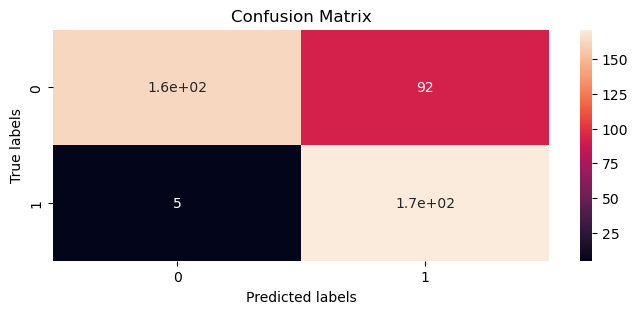

In [42]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [43]:
# Generate and print a classification report showing precision, recall, F1-score, and accuracy 
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))


              precision    recall  f1-score   support

           0       0.97      0.64      0.77       254
           1       0.65      0.97      0.78       176

    accuracy                           0.77       430
   macro avg       0.81      0.80      0.77       430
weighted avg       0.84      0.77      0.77       430



In [44]:
# Check for overfitting by comparing train and test accuracy
train_acc = logreg_cv.score(X_train, Y_train)
test_acc = logreg_cv.score(X_test, Y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.7780914737436476
Test Accuracy : 0.7790432801822323


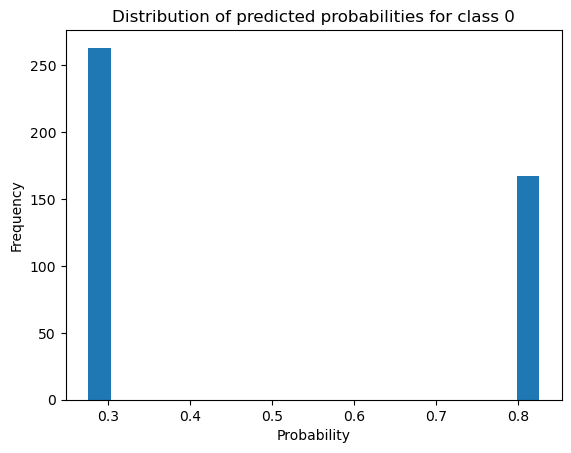

In [45]:
yhat = logreg_cv.predict_proba(X_test)[:, 0]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 0")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

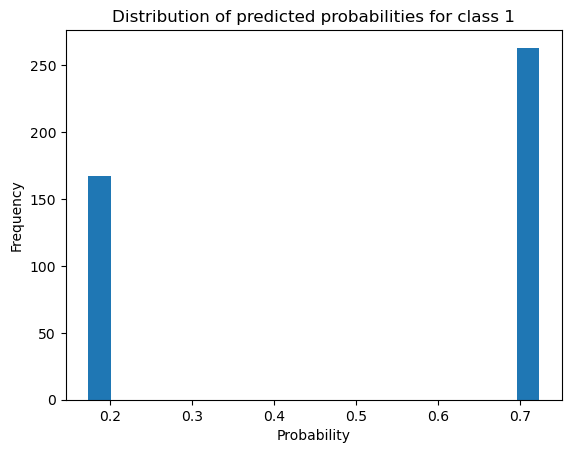

In [46]:
yhat = logreg_cv.predict_proba(X_test)[:, 1]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

## Support Vector Machine (SVM)


In [48]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': (0.01, 0.1, 0.5),
             'gamma':(0.005,0.01, 0.1, 0.5, 1, 1.5, 2)
             }
svm = SVC(probability=True, class_weight=weights)

In [49]:
svm_cv = GridSearchCV(svm, parameters, cv = 5, scoring='f1', n_jobs=-1)
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             n_jobs=-1,
             param_grid={'C': (0.01, 0.1, 0.5),
                         'gamma': (0.005, 0.01, 0.1, 0.5, 1, 1.5, 2),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='f1')

In [50]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
accuracy : 0.7782172961116445


Calculate the accuracy on the test data using the method <code>score</code>:


In [52]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)


0.7790432801822323

### Confusion Matrix


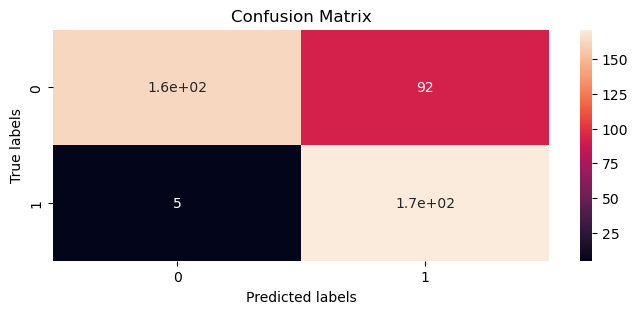

In [54]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


In [55]:
# Generate and print a classification report showing precision, recall, F1-score, and accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       254
           1       0.65      0.97      0.78       176

    accuracy                           0.77       430
   macro avg       0.81      0.80      0.77       430
weighted avg       0.84      0.77      0.77       430



In [56]:
# Check for overfitting by comparing train and test accuracy
train_acc = svm_cv.score(X_train, Y_train)
test_acc = svm_cv.score(X_test, Y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.7780914737436476
Test Accuracy : 0.7790432801822323


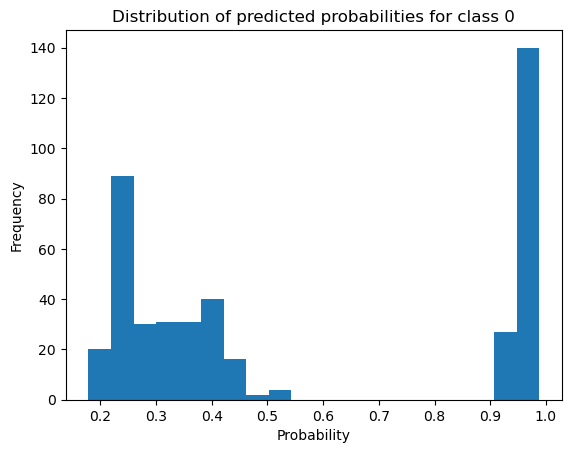

In [57]:
yhat = svm_cv.predict_proba(X_test)[:, 0]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 0")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

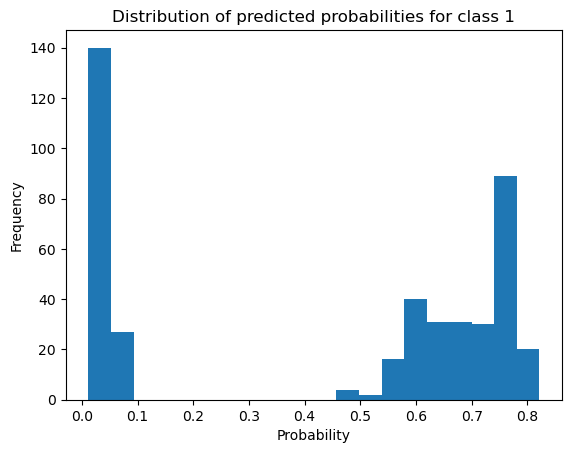

In [58]:
yhat = svm_cv.predict_proba(X_test)[:, 1]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

## Decision Trees


In [60]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]
             }
tree = DecisionTreeClassifier(class_weight=weights)

In [61]:
tree_cv = GridSearchCV(tree, parameters, cv = 10, scoring='f1', n_jobs=-1)
tree_cv.fit(X_train, Y_train)


E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1557 fits failed with the following error:
Traceback (most recent call last):
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1')

https://github.com/Mahdi-Alijani-Lati

In [62]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.739560551066487


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [64]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)


0.7563805104408353

### Confusion Matrix


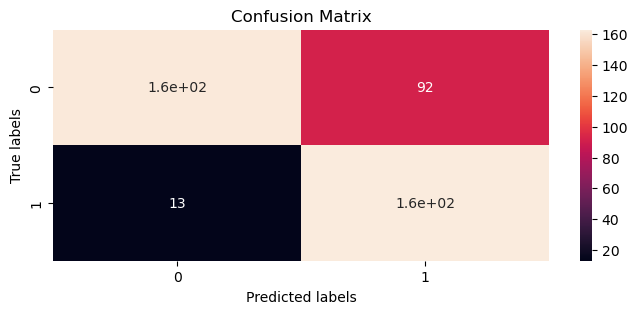

In [66]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


In [67]:
# Generate and print a classification report showing precision, recall, F1-score, and accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       254
           1       0.64      0.93      0.76       176

    accuracy                           0.76       430
   macro avg       0.78      0.78      0.76       430
weighted avg       0.81      0.76      0.76       430



In [68]:
# Check for overfitting by comparing train and test accuracy
train_acc = tree_cv.score(X_train, Y_train)
test_acc = tree_cv.score(X_test, Y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.7775229357798165
Test Accuracy : 0.7563805104408353


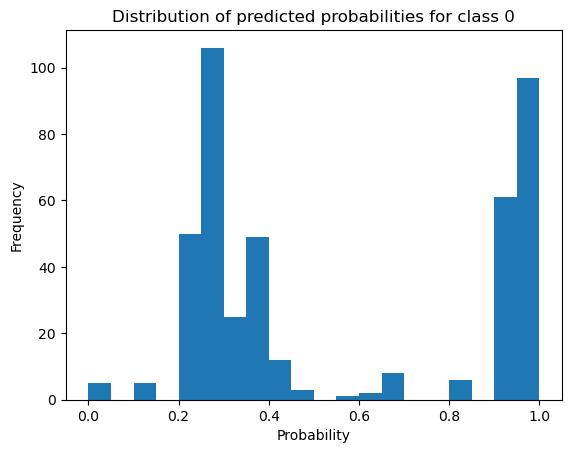

In [69]:
yhat = tree_cv.predict_proba(X_test)[:, 0]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 0")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

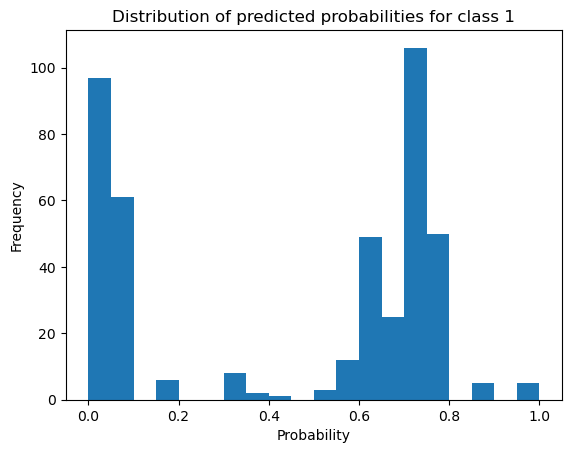

In [70]:
yhat = tree_cv.predict_proba(X_test)[:, 1]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

## Random Forest

In [72]:
parameters = {'n_estimators': [10,20,30],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [0.5,1, 2, 4],
              'min_samples_split': [1, 2, 5, 10]
             }
rfc = RandomForestClassifier(class_weight=weights)

In [73]:
rfc_cv = GridSearchCV(rfc, parameters, cv = 10, scoring='f1', n_jobs=-1)
rfc_cv.fit(X_train, Y_train)


E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5400 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2066 fits failed with the following error:
Traceback (most recent call last):
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.5, 1, 2, 4],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='f1')

In [74]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
accuracy : 0.7759513914696515


In [75]:
accu.append(rfc_cv.score(X_test,Y_test))
methods.append('Random Forest classifier')
rfc_cv.score(X_test,Y_test)

0.7790432801822323

### Confusion Matrix

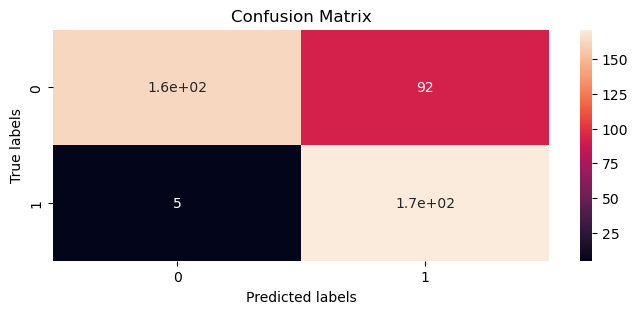

In [77]:
yhat = rfc_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


In [78]:
# Generate and print a classification report showing precision, recall, F1-score, and accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       254
           1       0.65      0.97      0.78       176

    accuracy                           0.77       430
   macro avg       0.81      0.80      0.77       430
weighted avg       0.84      0.77      0.77       430



In [79]:
# Check for overfitting by comparing train and test accuracy
train_acc = rfc_cv.score(X_train, Y_train)
test_acc = rfc_cv.score(X_test, Y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.7773371104815864
Test Accuracy : 0.7790432801822323


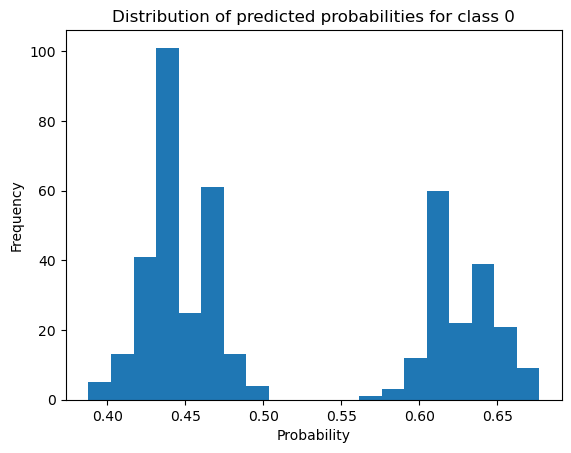

In [80]:
yhat = rfc_cv.predict_proba(X_test)[:, 0]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 0")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

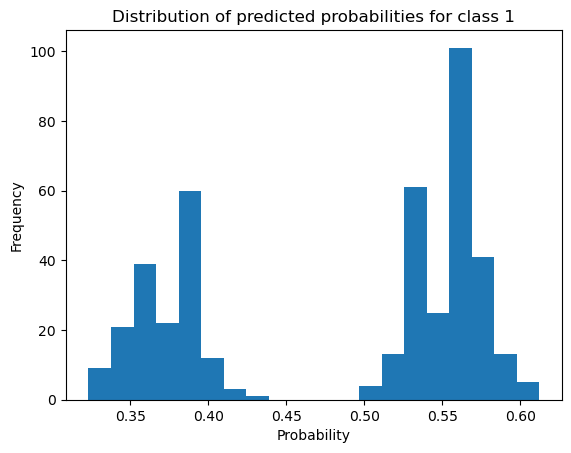

In [81]:
yhat = rfc_cv.predict_proba(X_test)[:, 1]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

## K Nearest Neighbors

In [83]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],
              'weights':['uniform', 'distance']
              }
KNN = KNeighborsClassifier()

In [84]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10, scoring='f1', n_jobs=-1)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1')

In [85]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
accuracy : 0.5790504370608943


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [87]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.5333333333333333

### Confusion Matrix


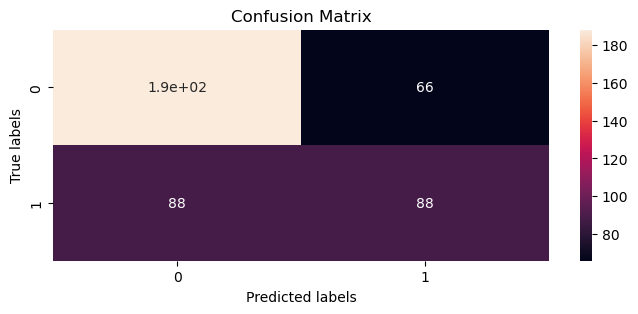

In [89]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)


In [90]:
# Generate and print a classification report showing precision, recall, F1-score, and accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       254
           1       0.57      0.50      0.53       176

    accuracy                           0.64       430
   macro avg       0.63      0.62      0.62       430
weighted avg       0.64      0.64      0.64       430



In [91]:
# Check for overfitting by comparing train and test accuracy
train_acc = knn_cv.score(X_train, Y_train)
test_acc = knn_cv.score(X_test, Y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 1.0
Test Accuracy : 0.5333333333333333


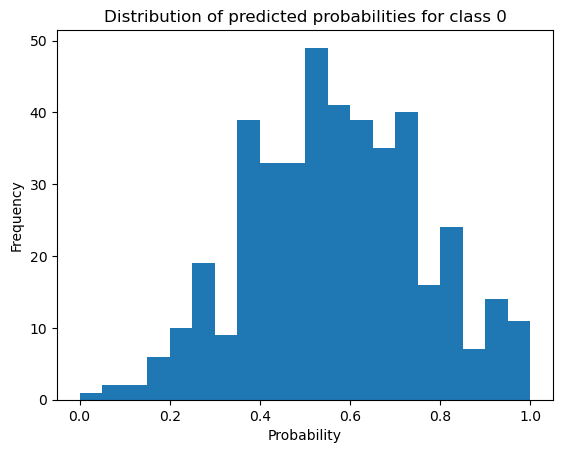

In [92]:
yhat = knn_cv.predict_proba(X_test)[:, 0]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 0")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

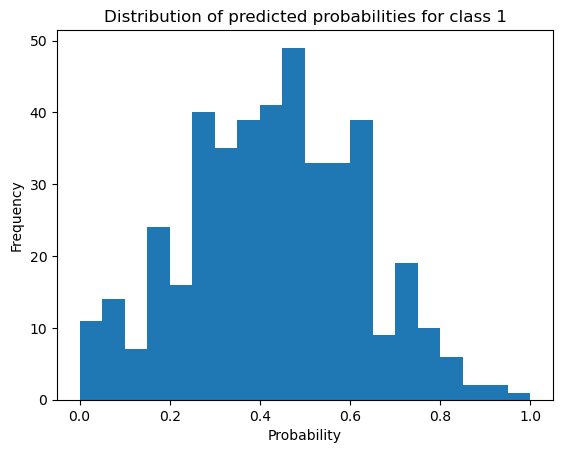

In [93]:
yhat = knn_cv.predict_proba(X_test)[:, 1]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

#  XGBoost (eXtreme Gradient Boosting)

In [95]:
parameters = {'n_estimators': [10, 20, 50],
              'max_depth': [0.5, 1, 2],
              'learning_rate': [0.001,0.01, 0.05, 0.1],
              'subsample': [0.8, 0.9, 1.0],
              'colsample_bytree': [0.2, 0.4, 0.6]
             }
xgb = XGBClassifier( use_label_encoder=False,eval_metric='logloss')


In [96]:
xgb_cv = GridSearchCV(xgb, parameters, cv=5, scoring='f1', n_jobs=-1)
xgb_cv.fit(X_train, Y_train)


E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "E:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1682, in fit
    self._Booster = train(
                    ^^^^^^
  File "E:\ProgramDa

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.2, 0.4, 0.6],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [0.5, 1, 2], 'n_estimators': [10, 20, 50],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1')

In [97]:
print("Tuned hyperparameters (best parameters):", xgb_cv.best_params_)
print("Best CV accuracy:", xgb_cv.best_score_)

Tuned hyperparameters (best parameters): {'colsample_bytree': 0.4, 'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.8}
Best CV accuracy: 0.7786398114865095


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [99]:
accu.append(xgb_cv.score(X_test, Y_test))
methods.append('XGBoost')
print("Test accuracy:", xgb_cv.score(X_test, Y_test))

Test accuracy: 0.7790432801822323


### Confusion Matrix


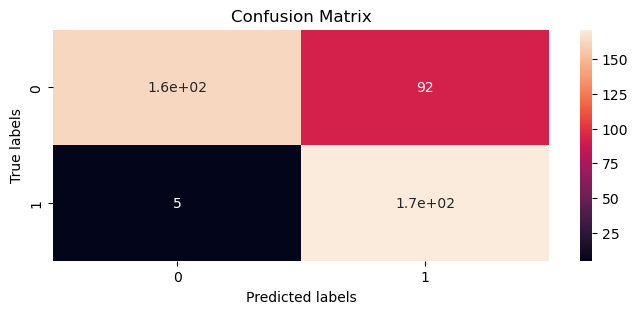

In [101]:
yhat = xgb_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [102]:
# Count the number of occurrences of each unique predicted class in yhat
np.unique(yhat, return_counts=True)

(array([0, 1]), array([167, 263], dtype=int64))

In [103]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       254
           1       0.65      0.97      0.78       176

    accuracy                           0.77       430
   macro avg       0.81      0.80      0.77       430
weighted avg       0.84      0.77      0.77       430



In [104]:
# Check for overfitting by comparing train and test accuracy
train_acc = xgb_cv.score(X_train, Y_train)
test_acc = xgb_cv.score(X_test, Y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.7780914737436476
Test Accuracy : 0.7790432801822323


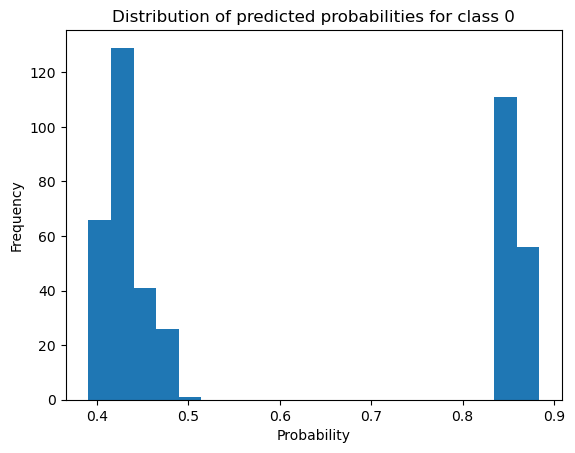

In [105]:
yhat = xgb_cv.predict_proba(X_test)[:, 0]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 0")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

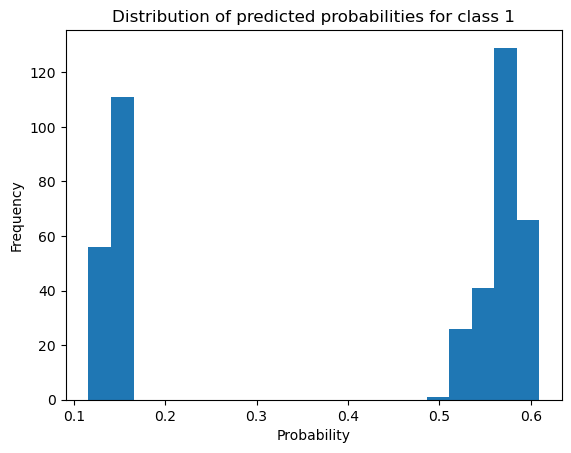

In [106]:
yhat = xgb_cv.predict_proba(X_test)[:, 1]
plt.hist(yhat, bins=20)
plt.title("Distribution of predicted probabilities for class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

# Find the method performs best:


In [108]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'Random Forest classifier', 'k nearest neighbors', 'XGBoost']
[0.7790432801822323, 0.7790432801822323, 0.7563805104408353, 0.7790432801822323, 0.5333333333333333, 0.7790432801822323]


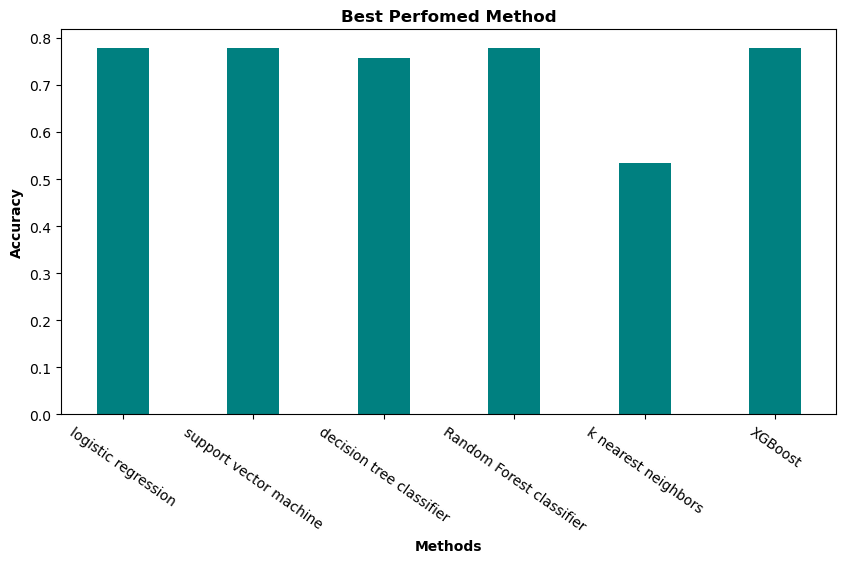

In [109]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(methods, accu, color ="#008080",width = 0.4)
plt.xlabel("Methods", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.title("Best Perfomed Method", fontweight='bold')
plt.xticks(rotation=-35)
plt.show()

# SAVE-LOAD the trained model using pickle 


In [111]:
# save
with open('Pathrise_Classification.pkl','wb') as f: pickle.dump(svm_cv,f)

# ROC Curve

### Logistic Regression Area Under ROC

Text(0.5, 1.0, 'Logistic Regression Area Under ROC')

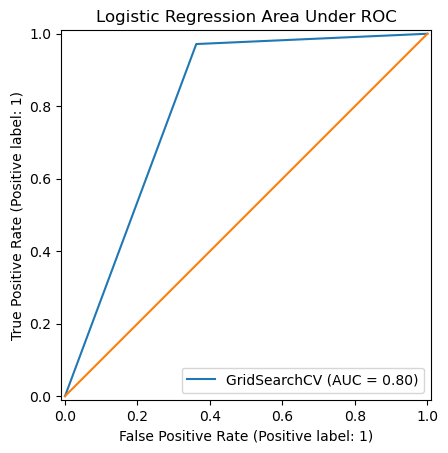

In [114]:
RocCurveDisplay.from_estimator(logreg_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Logistic Regression Area Under ROC')

### Support Vector Machine Area Under ROC

Text(0.5, 1.0, 'Support Vector Machine Area Under ROC')

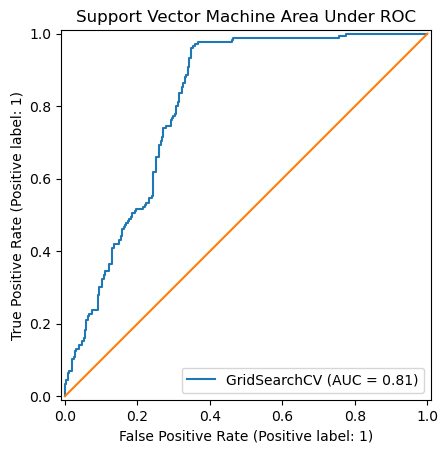

In [116]:
RocCurveDisplay.from_estimator(svm_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Support Vector Machine Area Under ROC')

### Decision Trees Area Under ROC

Text(0.5, 1.0, 'Decision Trees Area Under ROC')

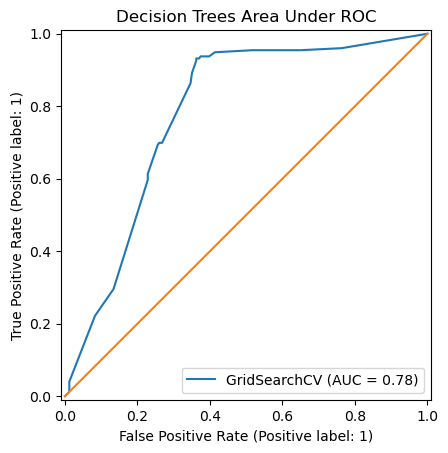

In [118]:
RocCurveDisplay.from_estimator(tree_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Decision Trees Area Under ROC')

### Random Forest Area Under ROC

Text(0.5, 1.0, 'Random Forest Area Under ROC')

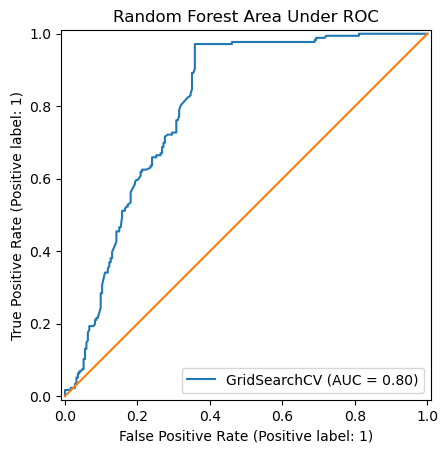

In [120]:
RocCurveDisplay.from_estimator(rfc_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Random Forest Area Under ROC')

### K Nearest Neighbors Area Under ROC

Text(0.5, 1.0, 'K Nearest Neighbors Area Under ROC')

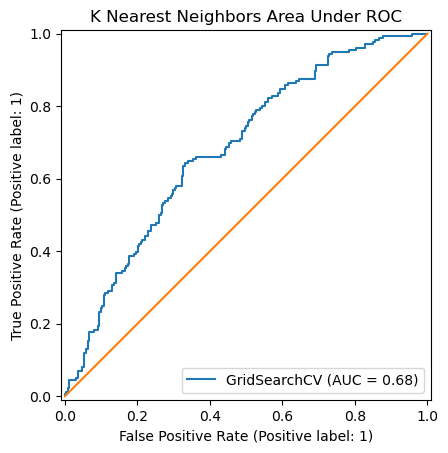

In [122]:
RocCurveDisplay.from_estimator(knn_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('K Nearest Neighbors Area Under ROC')

### XGBoost Area Under ROC

Text(0.5, 1.0, 'XGBoost Area Under ROC')

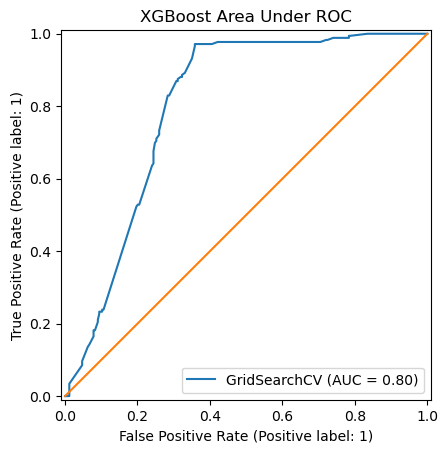

In [124]:
RocCurveDisplay.from_estimator(xgb_cv,X_test, Y_test)
plt.plot([0,1],[0,1])
plt.title('XGBoost Area Under ROC')

# Analyzing Feature Importance Based on Model Coefficients

In [126]:
lr.fit(X_train, Y_train)
# Extract model coefficients and identify the most influential features
# دریافت ضریب‌های مدل و نمایش ویژگی‌های مهم‌تر
importance = np.abs(lr.coef_[0])
sorted_features = sorted(zip(X_train.columns, importance), key=lambda x: x[1], reverse=True)

importance_lr = pd.DataFrame(sorted_features, columns=["Feature", "Importance"])

print(importance_lr)

                                   Feature  Importance
0                      short_participation    2.125723
1         work_auth_grouped_Not Authorized    0.269469
2   race_Native American or Alaskan Native    0.222492
3                        cohort_tag_OCT21A    0.195092
4                        cohort_tag_MAR18A    0.166075
..                                     ...         ...
89                       cohort_tag_JUN19A    0.005755
90                       cohort_tag_OCT19B    0.005522
91              employment_status _Student    0.001328
92       professional_experience_3-4 years    0.000712
93                       cohort_tag_APR18B    0.000489

[94 rows x 2 columns]


In [127]:
model2 = SVC(kernel="linear")  
model2.fit(X_train, Y_train)
# Extract model coefficients and identify the most influential features
# دریافت ضریب‌های مدل و نمایش ویژگی‌های مهم‌تر
importance = np.abs(model2.coef_[0])
sorted_features = sorted(zip(X_train.columns, importance), key=lambda x: x[1], reverse=True)

importance_svm = pd.DataFrame(sorted_features, columns=["Feature", "Importance"])

print(importance_lr)

                                   Feature  Importance
0                      short_participation    2.125723
1         work_auth_grouped_Not Authorized    0.269469
2   race_Native American or Alaskan Native    0.222492
3                        cohort_tag_OCT21A    0.195092
4                        cohort_tag_MAR18A    0.166075
..                                     ...         ...
89                       cohort_tag_JUN19A    0.005755
90                       cohort_tag_OCT19B    0.005522
91              employment_status _Student    0.001328
92       professional_experience_3-4 years    0.000712
93                       cohort_tag_APR18B    0.000489

[94 rows x 2 columns]


In [128]:
tree.fit(X_train, Y_train)
# Extract model coefficients and identify the most influential features
# دریافت ضریب‌های مدل و نمایش ویژگی‌های مهم‌تر
importance = tree.feature_importances_
sorted_features = sorted(zip(X_train.columns, importance), key=lambda x: x[1], reverse=True)

importance_tree = pd.DataFrame(sorted_features, columns=["Feature", "Importance"])

print(importance_tree)

                                  Feature  Importance
0                     short_participation    0.417910
1                  number_of_applications    0.077753
2                    number_of_interviews    0.042473
3            length_of_job_search_encoded    0.023207
4     race_South Asian or Indian American    0.016023
..                                    ...         ...
89                      cohort_tag_AUG18A    0.000000
90                      cohort_tag_MAY19A    0.000000
91                      cohort_tag_OCT21A    0.000000
92                      cohort_tag_SEP18A    0.000000
93  education_grouped_High School or Less    0.000000

[94 rows x 2 columns]


In [129]:
rfc.fit(X_train, Y_train)
# Extract model coefficients and identify the most influential features
# دریافت ضریب‌های مدل و نمایش ویژگی‌های مهم‌تر
importance = rfc.feature_importances_
sorted_features = sorted(zip(X_train.columns, importance), key=lambda x: x[1], reverse=True)

importance_rfc = pd.DataFrame(sorted_features, columns=["Feature", "Importance"])

print(importance_rfc)

                                   Feature  Importance
0                      short_participation    0.305971
1                   number_of_applications    0.067133
2                     number_of_interviews    0.045510
3             length_of_job_search_encoded    0.036818
4             education_grouped_Bachelor’s    0.014678
..                                     ...         ...
89                       cohort_tag_MAY19A    0.000770
90  race_Native American or Alaskan Native    0.000721
91                       cohort_tag_MAR20A    0.000673
92                       cohort_tag_OCT21A    0.000575
93                       cohort_tag_APR20A    0.000420

[94 rows x 2 columns]


In [130]:
KNN.fit(X_train, Y_train)
# Extract model coefficients and identify the most influential features
# دریافت ضریب‌های مدل و نمایش ویژگی‌های مهم‌تر
result = permutation_importance(KNN, X_train, Y_train, n_repeats=10, random_state=101)
importance = result.importances_mean
sorted_features = sorted(zip(X_train.columns, importance), key=lambda x: x[1], reverse=True)

importance_KNN = pd.DataFrame(sorted_features, columns=["Feature", "Importance"])

print(importance_KNN)

                                         Feature  Importance
0                            short_participation    0.037791
1            race_South Asian or Indian American    0.005814
2                              cohort_tag_APR18A    0.005000
3   biggest_challenge_in_search_Technical skills    0.004477
4               professional_experience_5+ years    0.004128
..                                           ...         ...
89         employment_status _Employed Part-Time   -0.004070
90                       work_auth_grouped_Other   -0.004186
91                             primary_track_SWE   -0.004186
92                             cohort_tag_JAN20B   -0.004593
93                 employment_status _Unemployed   -0.007674

[94 rows x 2 columns]


https://github.com/Mahdi-Alijani-Lati